In [1]:
#|default_exp app

## Gradio Pets

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

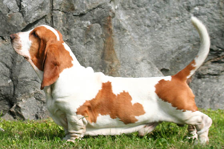

In [4]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [5]:
#export
learn = load_learner('model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [5]:
learn.predict(im)

('basset_hound',
 TensorBase(14),
 TensorBase([1.8399e-06, 6.9743e-05, 1.2756e-05, 3.8912e-06, 5.5747e-07, 1.9816e-05,
         3.3903e-06, 1.2291e-05, 8.8069e-06, 3.3049e-07, 4.7154e-06, 1.0780e-06,
         5.2836e-04, 3.7090e-05, 9.8938e-01, 9.0365e-03, 8.2160e-05, 6.5614e-07,
         9.1344e-05, 2.7471e-06, 2.9094e-06, 8.0382e-07, 3.3430e-06, 3.9379e-05,
         5.8145e-06, 1.6686e-06, 1.6690e-07, 4.5227e-05, 7.4895e-07, 1.8120e-07,
         5.3700e-04, 1.2602e-05, 1.7675e-05, 1.2343e-05, 1.8821e-05, 5.7948e-07,
         5.5970e-07]))

In [6]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Abyssinian': 1.8398773136141244e-06,
 'Bengal': 6.974329153308645e-05,
 'Birman': 1.275579688808648e-05,
 'Bombay': 3.8912407944735605e-06,
 'British_Shorthair': 5.574654551310232e-07,
 'Egyptian_Mau': 1.9816458006971516e-05,
 'Maine_Coon': 3.3902545055752853e-06,
 'Persian': 1.2291030543565284e-05,
 'Ragdoll': 8.806910955172498e-06,
 'Russian_Blue': 3.3048647196665115e-07,
 'Siamese': 4.715384420705959e-06,
 'Sphynx': 1.078016225619649e-06,
 'american_bulldog': 0.0005283569917082787,
 'american_pit_bull_terrier': 3.709043448907323e-05,
 'basset_hound': 0.9893821477890015,
 'beagle': 0.00903652049601078,
 'boxer': 8.215981506509706e-05,
 'chihuahua': 6.561360805790173e-07,
 'english_cocker_spaniel': 9.134367428487167e-05,
 'english_setter': 2.7471251087263227e-06,
 'german_shorthaired': 2.9093755529174814e-06,
 'great_pyrenees': 8.038204555305128e-07,
 'havanese': 3.3430071653128834e-06,
 'japanese_chin': 3.937914880225435e-05,
 'keeshond': 5.814476935483981e-06,
 'leonberger': 1.668

In [8]:
#export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

In [9]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:3000/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f591050c970>,
 'http://127.0.0.1:3000/',
 None)

In [16]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
            )
            (1): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 

In [20]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2545e+00,  1.9196e+00,  1.2201e+00,  1.0390e+00, -1.6480e-03,
          7.6568e-01,  8.8830e-01,  1.6302e+00,  7.0489e-01,  3.2909e+00,
          7.8756e-01, -1.2321e-03,  1.0008e+00, -1.1701e-03,  3.2963e+00,
          7.5332e-04,  1.9848e+00,  1.0214e+00,  4.4530e+00,  2.5485e-01,
          2.7261e+00,  9.2749e-01,  1.2365e+00,  4.6786e-03,  1.7861e+00,
          5.4500e-01,  4.6252e+00,  1.1814e-02, -8.0696e-04,  3.4503e+00,
          1.3520e+00,  4.1267e+00,  2.6889e+00,  4.1214e+00,  3.4020e+00,
          8.4680e-01,  7.3639e-01,  3.9801e+00,  1.2857e+00,  6.4153e-01,
          2.6896e+00,  1.1183e+00,  1.1701e+00,  5.5256e-01,  2.3371e+00,
          2.6110e-04,  9.7016e-01,  2.1527e-03,  1.1990e+00,  1.7883e+00,
          4.0231e-01,  4.4849e-01,  9.7238e-01,  3.9889e+00,  6.5864e-01,
          6.8973e-01,  9.8424e-01,  2.7063e+00,  1.2161e+00,  7.5966e-01,
          3.3019e+00,  1.6209e+00,  9.5479e-01,  2.1214e+00,  6.2982e-01,
          4.034

In [26]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 2.2773e-02, -1.6051e-03,  4.0450e-02,  ...,  1.7370e-03,
          -4.5070e-02,  8.0949e-03],
         [-1.4383e-01,  1.6965e-02,  2.5983e-02,  ...,  1.2606e-02,
          -1.0443e-01,  5.6370e-02],
         [-6.5471e-02, -3.2719e-02,  5.6796e-03,  ..., -4.1571e-02,
           6.5921e-02, -4.0347e-02],
         ...,
         [-8.8080e-03,  6.9815e-02,  7.1424e-05,  ...,  4.0177e-03,
           4.1478e-02, -1.9052e-02],
         [ 2.0792e-03,  3.2267e-02,  2.9801e-02,  ..., -2.9897e-02,
          -3.0278e-02,  5.5432e-02],
         [ 1.2097e-01, -3.5444e-02, -4.6078e-03,  ..., -6.3829e-03,
           2.3691e-02, -1.1242e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.4047, -0.7418, -0.4235, -0.1650, -0.3028, -0.1898, -0.5534, -0.6271,
         -0.3008, -0.4254, -0.5997, -0.4107, -0.2172, -1.7935, -0.3170, -0.1163,
         -0.4482, -0.2846, -0.4342, -0.4945, -0.4065, -1.1402, -0.6754, -1.7237,
         -0.2955, -0.2654, -0.2187, -0.3914, 